# Learning Goals

- implement a simple model
- implement an environmental model
- learn on global balance energy
- design jupyter notebook adapted for presentation

# Jupyter Notebook Slides

### First Method

Use the following command in terminal to convert your notebook to html slides

`jupyter nbconvert energy_balance_model.ipynb --to slides --post serve`

### Second Method


Install rise package (more interactive) in conda with the following command

`conda install -c conda-forge rise`

Or use pip tool 

`pip install RISE`

After installation, you'll see a new icon on the right.

This icon would enable you to excecute your presentations

<img src="./images/rise_icon.png" width=700 align="left" />


# Energy balance model

By Peniel Adounkpe

Course: Computer modeling of complex system application to environmental management

## Contents

1. [Global Energy Budget](#section1)
2. [Objectives](#section2)
3. [Assumptions](#section3)
4. [Mathematical Equations](#section4)
5. [Representing time derivatives](#section5)
6. [Numerical solution](#section6)
7. [Visualization](#section7)

<a id='section1'></a>

## 1. Global Energy Budget
____________

![Observed global energy flows from Trenberth and Fasullo (2012)](./images/GlobalEnergyBudget.png)
**Figure 1: Global energy flows** | Trenbeth and Fasullo (2012)

<a id='section2'></a>

## 2. Objectives
____________

By how much would the temperature change in response to other changes in Earth system?
- Changes in greenhouse gases
- Changes in cloudiness

<a id='section3'></a>

## 3. Assumptions
____________

### Important variables

- $\tau$ is the **transmissivity** of the atmosphere, represents the greenhouse effect of Earth's atmosphere.
- $\alpha$ is the **planetary albedo**, the fraction of area-averaged incoming solar radiation that is reflected.

### Climate change scenario 

Suppose that, due to global warming (changes in atmospheric composition and subsequent changes in cloudiness):

- The longwave transmissitivity  $\tau$ decreases from 0.61 to 0.57
- The planetary albedo $\alpha$ increases from 0.29 to 0.32
- From $\tau$ and $\alpha$ we assume that the equilibrium temperature is 288 K

In [2]:
tau = 0.57
alpha = 0.32

<a id='section4'></a>

## 4. Mathematical Equations
____________

### Outgoing Longwave Radiation OLR

$$ \text{OLR} = \tau \sigma T_s^4 $$

where:

$\tau$ is the **transmissivity** of the atmosphere, a number less than 1 that represents the greenhouse effect of Earth's atmosphere.

$\sigma = 5.67E-8$ is the S-B constant 

$Ts$ is the global average surface temperature

In [3]:
sigma = 5.67E-8

### Absorbed Shortwave Radiation ASR

$$ \text{ASR} = Q - Freflected $$ 

where:

$Q$ = 341.3 W m$^{-2}$ is the area-averaged incoming solar radiation or **insolation** 

$F_{reflected}$ is some of the incoming radiation that is not totaly absorbed (simply reflected back to space)


$$ \text{ASR} = Q - Freflected $$ 

$$ \text{$F_{reflected}$} =  \alpha * Q $$

where:

$\alpha$ is the **planetary albedo** (the fraction of $Q$ that is reflected).

$$ \text{ASR} = (1-\alpha) Q $$

In [4]:
Q = 341.3

### Energy

$$ E = C T_s $$

where:

$C$ = 4E8 J m$^{-2} $K$^{-1}$ is a constant – the **effective heat capacity** of the atmosphere- ocean column

$T_s$ is the **global average surface temperature**

In [5]:
C = 4E8

### Energy balance equation

We will write the **total energy budget** of the Earth system as :

$$ \frac{dE}{dt} = ASR - OLR $$

**This equation is the starting point for EVERY CLIMATE MODEL.**

$$ C \frac{dT_s}{dt} = \text{ASR} - \text{OLR} $$

<a id='section5'></a>

## 5. Representing time derivatives
____________

Recall that the derivative is the **instantaneous rate of change**. It is defined as 

$$ \frac{dT}{dt} = \lim_{\Delta t\rightarrow 0}⁡ \frac{\Delta T}{\Delta t}$$

- **On the computer there is no such thing as an instantaneous change.** 
- We are always dealing with *discrete quantities*.
- So we approximate the derivative with $\Delta T/ \Delta t$. 
- So long as we take the time interval $\Delta t$ "small enough", the approximation is valid and useful.

$$ C \frac{dT_s}{dt} = \text{ASR} - \text{OLR} $$

$$ C  \frac{\Delta T}{\Delta t} \approx \text{ASR} - \text{OLR}$$

where $\Delta T$ is the **change in temperature predicted by our model** over a short time interval $\Delta t$.


$$ \Delta T = T_2-T_1 $$
$$ \Delta t = t_2-t_1 $$


$$ C  \frac{T_2-T_1}{\Delta t} = \text{ASR} - \text{OLR} $$

Which we can rearrange to **solve for the future temperature**:

$$ T_2 = T_1 + \frac{\Delta t}{C} \left( \text{ASR} - \text{OLR}(T_1) \right)  $$

<a id='section6'></a>

## 6. Numerical solution
____________

In [6]:
#import following fundamental packages of python (numpy and matplotlib)
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline 

The quantity $\Delta t$ is called a **timestep**. It is the smallest time interval represented in our model.

Here we're going to use a timestep of 1 year:

In [7]:
dt = 60. * 60. * 24. * 365.0   # one year expressed in seconds

In [8]:
#define fonctions

#Outgoing Longwave Radiation OLR (T1, tau=0.57)
T1 = 288.0
def olr(T1, tau):
    return tau * sigma * (T1**4)

#Absorbed Shortwave Radiation ASR (alpha=0.32)
def asr(alpha):
    return (1 - alpha) * Q

Time to define a function to make things easier and more reliable:

In [9]:
def step_forward(T):
    return T + dt / C * ( asr(alpha=0.32) - olr(T, tau=0.57) )

<a id='section7'></a>

## 7. Visualization
____________


In [10]:
numsteps = 30
Tsteps = np.zeros(numsteps+1)
Years = np.zeros(numsteps+1)
Tsteps[0] = 288.0
for n in range(numsteps):
    Years[n+1] = n+1
    Tsteps[n+1] = step_forward( Tsteps[n] )
print(Tsteps)

[288.         288.76780266 289.34792102 289.78523685 290.11433323
 290.36166675 290.54736768 290.68669049 290.79115953 290.86946109
 290.92813114 290.97208122 291.00499865 291.02964965 291.0481083
 291.06192909 291.07227674 291.08002371 291.08582346 291.09016532
 291.09341571 291.09584897 291.09767051 291.0990341  291.10005487
 291.100819   291.10139102 291.10181922 291.10213977 291.10237972
 291.10255934]


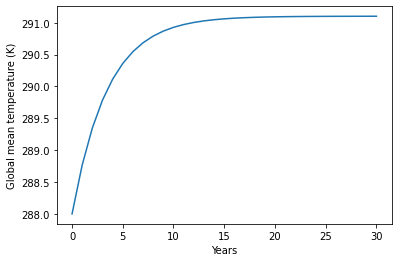

In [11]:
plt.plot( Years, Tsteps )
plt.xlabel('Years')
plt.ylabel('Global mean temperature (K)');

**Figure 2: Evolution of global temperature over the years**

## Reference: 

[Brian E. J. Rose](http://www.atmos.albany.edu/facstaff/brose/index.html) (2020), University at Albany

IPCC AR5 WG1 Glossary (2013), "Energy Budget"

![thank_you](./images/thank_you.png)